In [32]:
#importing all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math
import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [ ]:
#pd.DataFrame()
#converting .dat file into pandas dataframe.

dataset= pd.read_csv('airfoil_self_noise.dat', sep='\t', header=None)

#renaming the column names as follows:- 
#First five are independent variables and only 1 variable is dependent variable[Pressure Level(m)].
dataset.columns = ['Freq(hz)', 'Angle(deg)', 'Length(m)', 'Velocity(mps)', 'Thickness(m)', 'Pressure Level(m)']
dataset

#print(type(dataset))  => checked the dataframe size, it comes out to be pandas.

,Freq(hz),Angle(deg),Length(m),Velocity(mps),Thickness(m),Pressure Level(m)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [ ]:
#using the .shape function we can get dimensionality of the data set.
#dimensionality implies Rows*Columns.

dataset.shape

(1503, 6)

In [ ]:
#to see first five entries of the dataset we use .head() function.

dataset.head()

,Freq(hz),Angle(deg),Length(m),Velocity(mps),Thickness(m),Pressure Level(m)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [ ]:
#Generate descriptive statistics which can be used to see some relation in the data.

dataset.describe()

,Freq(hz),Angle(deg),Length(m),Velocity(mps),Thickness(m),Pressure Level(m)
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


# Data Preparation and Visualization.

In [ ]:
#to check the count no of missing values present in each column of dataframe.
dataset.isnull().sum()

#we saw that no missing values are present.

Freq(hz)             0
Angle(deg)           0
Length(m)            0
Velocity(mps)        0
Thickness(m)         0
Pressure Level(m)    0
dtype: int64

In [ ]:
#to check relation betweem all variables, we will find corelation between them
#its very difficult to read this data hence we will make a heat map so as to understand which are corelated variables.

dataset.corr()

,Freq(hz),Angle(deg),Length(m),Velocity(mps),Thickness(m),Pressure Level(m)
Freq(hz),1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle(deg),-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Length(m),-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Velocity(mps),0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Thickness(m),-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Pressure Level(m),-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


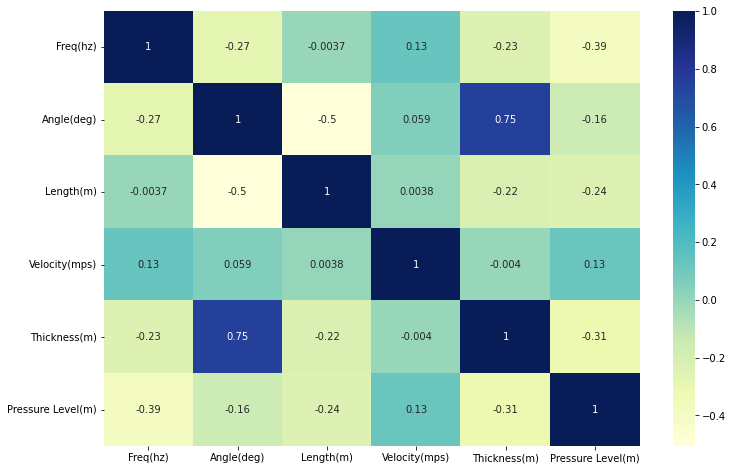

In [ ]:
#Using heatmap, we study correlation between variables i.e. how much two variables are corelated.

plt.figure(figsize=(12, 8))                    #used to manipulate the size of the plots.
dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
plt.show()

#We depicted that correlation between thickness and angle is high.
#Ideally a column should be dropped when the (correlation value >=0.8) and (correlation value <= -0.8).
#but here we drop either of the two columns irrespective of the value. [Angle or Thickness] 

In [ ]:
#In heatmap we have correlation between Thickness and Angle as 0.75.
#We will drop one of these values.
#Return whether all elements are True over an axis; means does everyone has a non zero value.
#If all non-zero = True else False.

dataset.all()


Freq(hz)              True
Angle(deg)           False
Length(m)             True
Velocity(mps)         True
Thickness(m)          True
Pressure Level(m)     True
dtype: bool

In [ ]:
#it returns the no of zeros in colums Angle(deg)
#Angle has 329 values as zero so we will drop this column.
(dataset['Angle(deg)'] == 0).sum()

329

In [ ]:
#we will drop the Angle Column and make changes into original dataset also using inplace=True.
dataset.drop(['Angle(deg)'], axis=1, inplace=True)
dataset

,Freq(hz),Length(m),Velocity(mps),Thickness(m),Pressure Level(m)
0,800,0.3048,71.3,0.002663,126.201
1,1000,0.3048,71.3,0.002663,125.201
2,1250,0.3048,71.3,0.002663,125.951
3,1600,0.3048,71.3,0.002663,127.591
4,2000,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...
1498,2500,0.1016,39.6,0.052849,110.264
1499,3150,0.1016,39.6,0.052849,109.254
1500,4000,0.1016,39.6,0.052849,106.604
1501,5000,0.1016,39.6,0.052849,106.224


In [ ]:
dataset.shape         #gives (rows,columns)

(1503, 5)

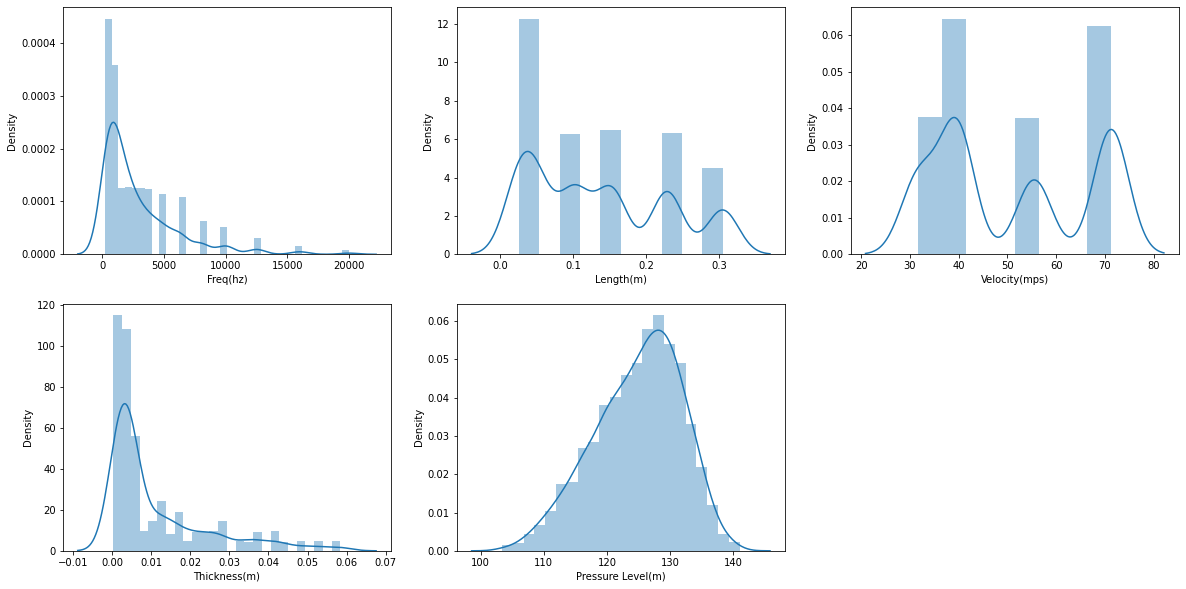

In [ ]:
#We are using distplot i.e. histogram to visualise the data. It is plotted for continous variables.
#As we have dropped one variable(Angle) earlier we are getting 5 plots here.

plt.figure(figsize=(20, 10))
columns = list(dataset.columns)
for i in range(5):
  plt.subplot(2, 3, i+1)
  sns.distplot(dataset[columns[i]])
plt.show()


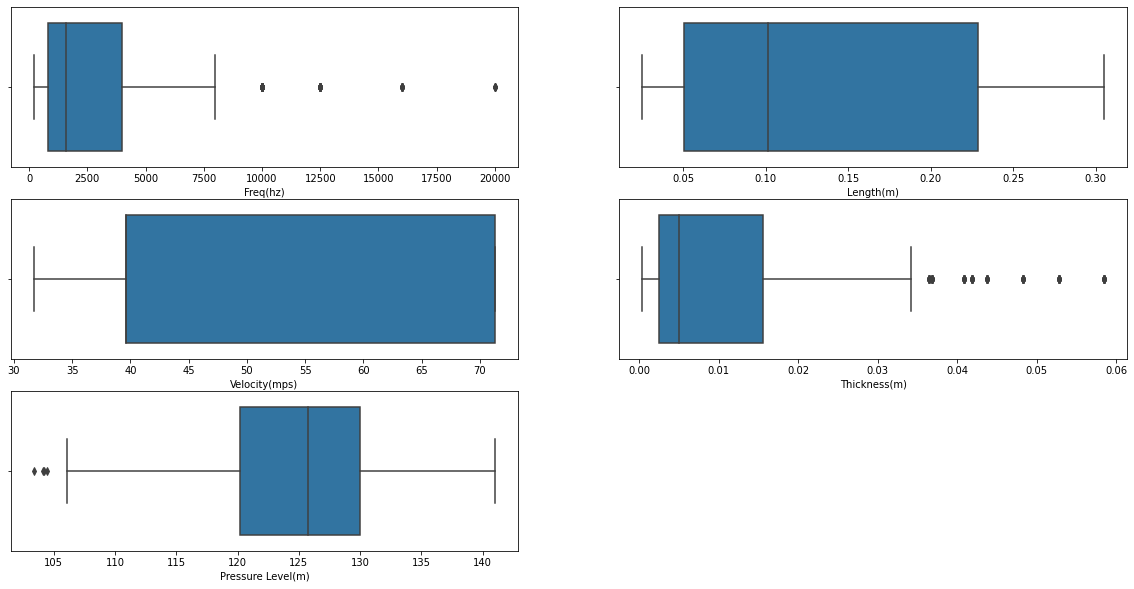

In [ ]:
#Box plot is used to visually interpret data using five-number summary. 
# 1.min 2.max 3.three quartiles(Q1,Q2,Q3)
#It is used to show distributions of numeric data values, 

plt.figure(figsize=(20, 10))
columns = list(dataset.columns)
for i in range(5):
  plt.subplot(3, 2, i+1)
  sns.boxplot(dataset[columns[i]])
plt.show()

# b) After the necessary data preparation, make a linear regression model to predict the target variable.

In [23]:
#seperating dependent and independent variable and making X dataframe having all independent variables and Y dataframe having all dependent variables.
X=dataset.drop(['Pressure Level(m)'], axis=1)
Y=dataset['Pressure Level(m)']
print(X.shape)
print(Y.shape)

(1503, 4)
(1503,)


In [24]:
#splitting the dataset training dataset and test dataset
#0.2 i.e. 20% of the data is test data. and 0.8 i.e. 80% of the data = training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [25]:
#printing the size of train and test dataset.
print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)

(301, 4)
(301,)
(1202, 4)
(1202,)


In [26]:
#Fit the model over the training dataset
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [27]:
#After fitting the model we will use that model over test dataset (preferable X_test) to see the prediction.
Y_pred_test=model.predict(X_test)
Y_pred_train=model.predict(X_train)

301


#c) Explaning Losses:
#### 1)MSE:
###### To calculate the MSE,we take the difference between our model’s predicted values and the actual value, square it, and average it out across the whole dataset. The MSE will never be negative, since we are always squaring the errors. 

#### 1)RMSE:
###### Root mean squared error (RMSE) is the square root of the mean sqaure error i.e. MSE. It will never be negative just like MSE.


#### 3)MAE: 
###### To calculate MAE, we take the difference between our model’s predicted values and the actual value, apply absolute value to that difference, and then average it out across the whole dataset. Just like MSE and RMSE, the MAE will never be negative since in this case we are always taking the absolute value of the errors.

# Calculating Losses

In [28]:
 #used for rmse,mse error calculation.

print(len(Y_pred_test))  
print(Y_pred_test.shape)
print(Y_test.shape)

301
(301,)
(301,)


In [ ]:
#We have already checked that both the dataframes are of equal size and dimension.
#Function from scratch.
from math import sqrt

#Mean Square Error
def mse(Y_test,Y_pred_test):
    diff =np.subtract(Y_test,Y_pred_test)
    mse=np.square(diff).mean()
    return mse 

def rmse(Y_test,Y_pred_test):
  error = mse(Y_test,Y_pred_test)
  rmse = sqrt(error)
  return rmse

print('The value of Mean Square Error: {}'.format(mse(Y_test,Y_pred_test)))
print('The value of Root Mean Square Error: {}'.format(rmse(Y_test,Y_pred_test)))

The value of Mean Square Error: 22.687006906878246
The value of Root Mean Square Error: 4.763087959179239


In [33]:
#Calculating Losses from Sklearn library.

mse = metrics.mean_squared_error(Y_test,Y_pred_test) 
print('The value of Mean Square Error: {}'.format(mse))

rmse= math.sqrt(mse)
print('The value of Root Mean Square Error: {}'.format(rmse))

mae= metrics.mean_absolute_error(Y_test,Y_pred_test)
print('The value of Mean Absolute Error: {}'.format(mae))


The value of Mean Square Error: 22.687006906878246
The value of Root Mean Square Error: 4.763087959179239
The value of Mean Absolute Error: 3.676483131358238


In [34]:

#R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines 
#the proportion of variance in the dependent variable that can be explained by the independent variable. 
#In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

train_score= model.score(X_train,Y_train)
test_score= model.score(X_test,Y_test)
print('Rsquare of training set: {}'.format(train_score*100))
print('Rsquare of test set: {}'.format(test_score*100))

Rsquare of training set: 46.74342576167606
Rsquare of test set: 51.769803457842855
